In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("labels_paligemma.csv")

In [4]:
data.head()

,BLEU-1,BLEU-2,BLEU-3,BLEU-4,CIDEr,METEOR,generated_caption,image_id,chair_hallucinated_objects_count,chair_hallucinated_objects_list,chair_has_hallucination,chair_mentioned_objects_count
0,8.333333e-17,8.703883e-17,9.116092e-17,9.578464e-17,0.000000,0.040336,How does the image make you feel? What do you ...,COCO_train2014_000000000009,0,NaN,0,0
1,4.104250e-02,1.835476e-09,6.515091e-09,1.227457e-08,0.210163,0.082474,giraffe<eos>,COCO_train2014_000000000025,0,NaN,0,1
2,1.111111e-16,1.178511e-16,1.256579e-16,1.348511e-16,0.000000,0.015686,Do not include words that are not necessary.<eos>,COCO_train2014_000000000030,0,NaN,0,0
3,1.238397e-01,4.229931e-09,1.458427e-11,9.054993e-13,0.000836,0.042911,How can you describe the image?<eos>,COCO_train2014_000000000034,0,NaN,0,0
4,7.692308e-02,2.531848e-09,8.352713e-12,4.913271e-13,0.000209,0.077890,How do you know? What makes you think that's t...,COCO_train2014_000000000036,0,NaN,0,0


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BLEU-1                            3125 non-null   float64
 1   BLEU-2                            3125 non-null   float64
 2   BLEU-3                            3125 non-null   float64
 3   BLEU-4                            3125 non-null   float64
 4   CIDEr                             3125 non-null   float64
 5   METEOR                            3125 non-null   float64
 6   generated_caption                 3125 non-null   object 
 7   image_id                          3125 non-null   object 
 8   chair_hallucinated_objects_count  3125 non-null   int64  
 9   chair_hallucinated_objects_list   180 non-null    object 
 10  chair_has_hallucination           3125 non-null   int64  
 11  chair_mentioned_objects_count     3125 non-null   int64  
dtypes: flo

In [6]:
data.chair_hallucinated_objects_count.value_counts()

chair_hallucinated_objects_count
0    2945
1     153
2      19
3       6
4       2
Name: count, dtype: int64

In [7]:
data.chair_has_hallucination.value_counts()

chair_has_hallucination
0    2945
1     180
Name: count, dtype: int64

In [8]:
data.chair_mentioned_objects_count.value_counts()

chair_mentioned_objects_count
0    2106
1     755
2     187
3      57
4      16
5       3
6       1
Name: count, dtype: int64

In [9]:
data['chair_regression_score'] = data.chair_hallucinated_objects_count / data.chair_mentioned_objects_count

<Axes: ylabel='Density'>

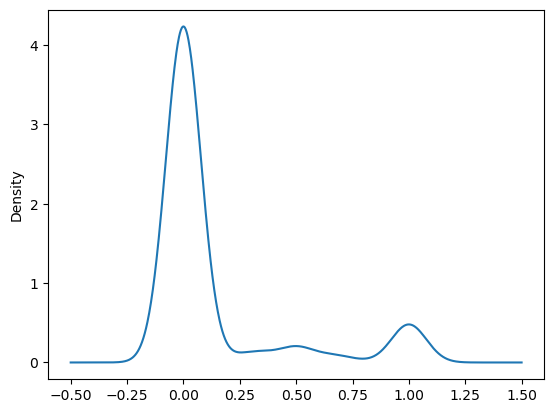

In [10]:
data.chair_regression_score.plot(kind='kde')

In [11]:
data.chair_regression_score.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3125 entries, 0 to 3124
Series name: chair_regression_score
Non-Null Count  Dtype  
--------------  -----  
1019 non-null   float64
dtypes: float64(1)
memory usage: 24.5 KB


In [12]:
data.head()

,BLEU-1,BLEU-2,BLEU-3,BLEU-4,CIDEr,METEOR,generated_caption,image_id,chair_hallucinated_objects_count,chair_hallucinated_objects_list,chair_has_hallucination,chair_mentioned_objects_count,chair_regression_score
0,8.333333e-17,8.703883e-17,9.116092e-17,9.578464e-17,0.000000,0.040336,How does the image make you feel? What do you ...,COCO_train2014_000000000009,0,NaN,0,0,NaN
1,4.104250e-02,1.835476e-09,6.515091e-09,1.227457e-08,0.210163,0.082474,giraffe<eos>,COCO_train2014_000000000025,0,NaN,0,1,0.0
2,1.111111e-16,1.178511e-16,1.256579e-16,1.348511e-16,0.000000,0.015686,Do not include words that are not necessary.<eos>,COCO_train2014_000000000030,0,NaN,0,0,NaN
3,1.238397e-01,4.229931e-09,1.458427e-11,9.054993e-13,0.000836,0.042911,How can you describe the image?<eos>,COCO_train2014_000000000034,0,NaN,0,0,NaN
4,7.692308e-02,2.531848e-09,8.352713e-12,4.913271e-13,0.000209,0.077890,How do you know? What makes you think that's t...,COCO_train2014_000000000036,0,NaN,0,0,NaN


In [13]:
data.dropna(subset=["chair_regression_score"], inplace=True)

In [14]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1019 entries, 1 to 3121
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BLEU-1                            1019 non-null   float64
 1   BLEU-2                            1019 non-null   float64
 2   BLEU-3                            1019 non-null   float64
 3   BLEU-4                            1019 non-null   float64
 4   CIDEr                             1019 non-null   float64
 5   METEOR                            1019 non-null   float64
 6   generated_caption                 1019 non-null   object 
 7   image_id                          1019 non-null   object 
 8   chair_hallucinated_objects_count  1019 non-null   int64  
 9   chair_hallucinated_objects_list   180 non-null    object 
 10  chair_has_hallucination           1019 non-null   int64  
 11  chair_mentioned_objects_count     1019 non-null   int64  
 12  chair_regre

In [15]:
data.to_csv("labels_paligemma_f.csv", index=False)

In [21]:

import h5py
f = h5py.File('/root/project/Thesis_LLAVA/keen_probe/keen_data/paligemma_extracted_embeddings/generation_embeddings.h5', 'r')
print(list(f['COCO_train2014_000000000009'].keys()))
print(list(f['COCO_train2014_000000000009']['pre_generation'].keys()))
print(list(f['COCO_train2014_000000000009']['pre_generation']['layer_0'].keys()))
print(len(f['COCO_train2014_000000000009']['pre_generation']['layer_0']['image_embeddings']))


['generated_caption', 'image_id', 'post_generation', 'pre_generation', 'tokens_length', 'vision_embeddings']
['layer_0', 'layer_1', 'layer_16']
['image_embeddings', 'query_embeddings']
2048


In [22]:
import h5py

h5_path = "/root/project/Thesis_LLAVA/keen_probe/keen_data/paligemma_extracted_embeddings/generation_embeddings.h5"
image_id = "COCO_train2014_000000022080"

with h5py.File(h5_path, "r") as f:
    print("Group exists:", image_id in f)
    if image_id in f:
        print("pre_generation exists:", "pre_generation" in f[image_id])
        if "pre_generation" in f[image_id]:
            print("layer_0 exists:", "layer_0" in f[image_id]["pre_generation"])
            if "layer_0" in f[image_id]["pre_generation"]:
                print("image_embeddings exists:", "image_embeddings" in f[image_id]["pre_generation"]["layer_0"])

Group exists: True
pre_generation exists: True
layer_0 exists: True
image_embeddings exists: True


In [ ]:
COCO_train2014_000000000009

In [ ]:
COCO_train2014_000000000009

In [ ]:
COCO_train2014_000000000009